In [1]:
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)

In [2]:
%run 'daily_bin/daily_functions.ipynb'

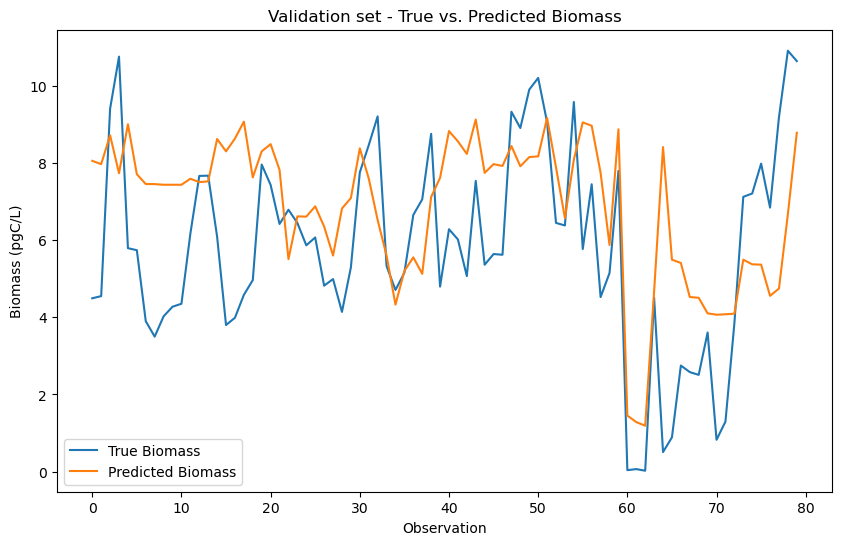

2.4760280492757683


In [3]:
val_set_RMSE = val_set(features_pro, labels_pro)
print(val_set_RMSE)

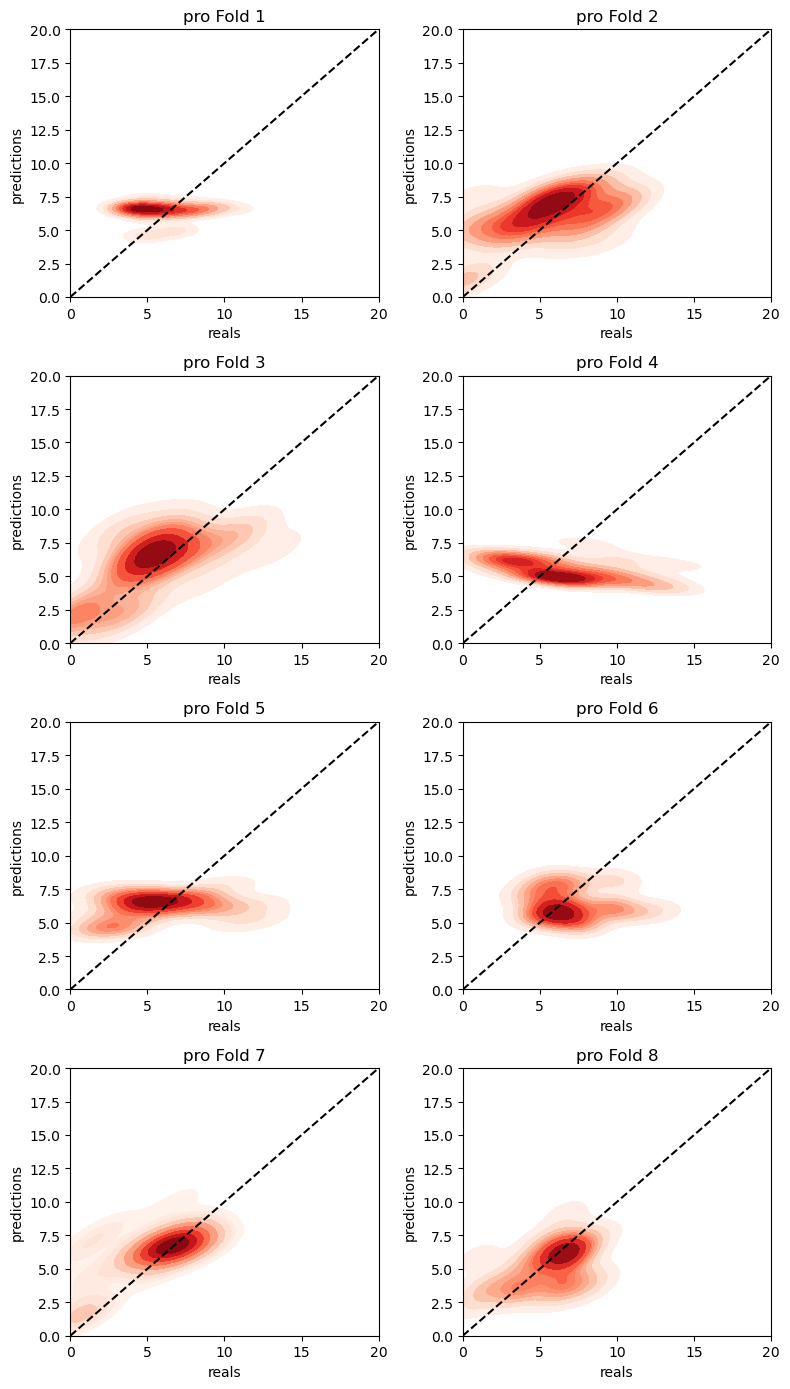

In [4]:
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, False, None)
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

hyperparameters={'n_estimators': 160, 'max_depth': 18, 'max_features': 'sqrt'}
model_training(train_features, train_labels, test_features, test_labels, hyperparameters, 'pro')

predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

plot_predictions('pro')

In [5]:
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)
predictions, maes, rmses, old_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')
merged_df = covari_predictions(predictions, 'pro')
predict_all_cruises(merged_df, 'pro')

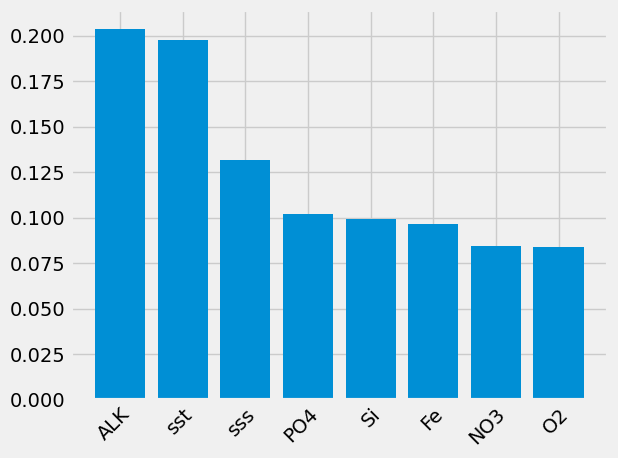

In [6]:
feature_importance('pro',feature_list_pro)

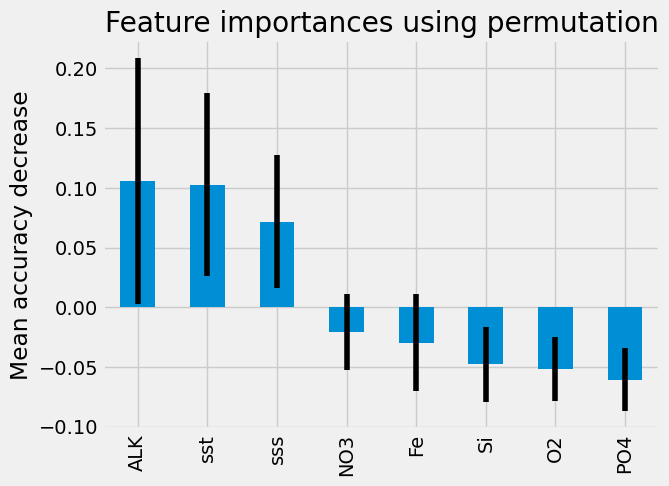

In [7]:
permutation_importances('pro', test_features, test_labels, feature_list_pro)

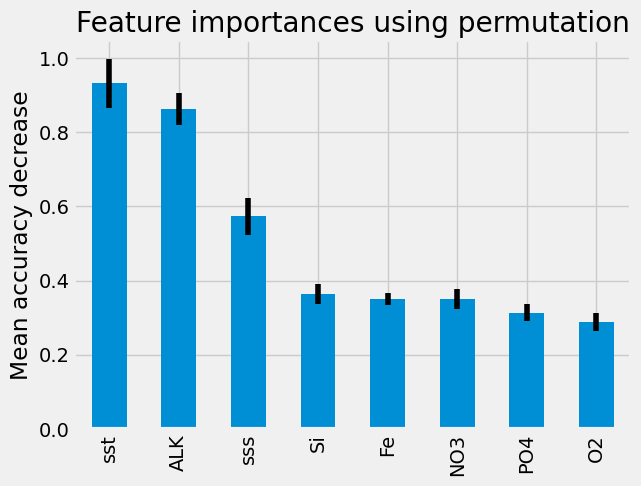

In [8]:
permutation_full(features_pro, labels_pro, feature_list_pro)

In [9]:
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, True, ['Si','PO4', 'NO3', 'Fe', 'O2'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)
predict_cruise(hyperparameters, 'pro')
predictions, maes, rmses, perm_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

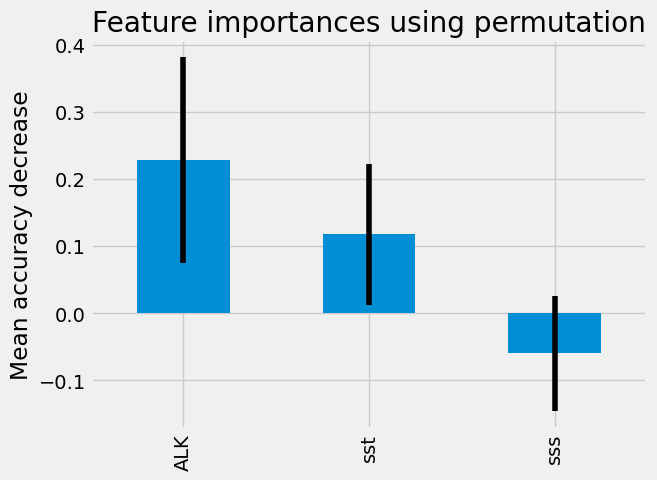

In [10]:
permutation_importances('pro', test_features, test_labels, feature_list_pro)

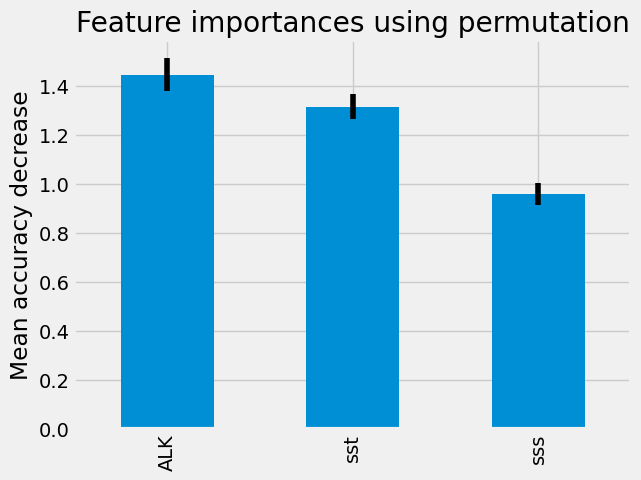

In [11]:
permutation_full(features_pro, labels_pro, feature_list_pro)

In [12]:
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, True, ['NO3', 'Fe', 'O2'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)
predict_cruise(hyperparameters, 'pro')
predictions, maes, rmses, feat_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

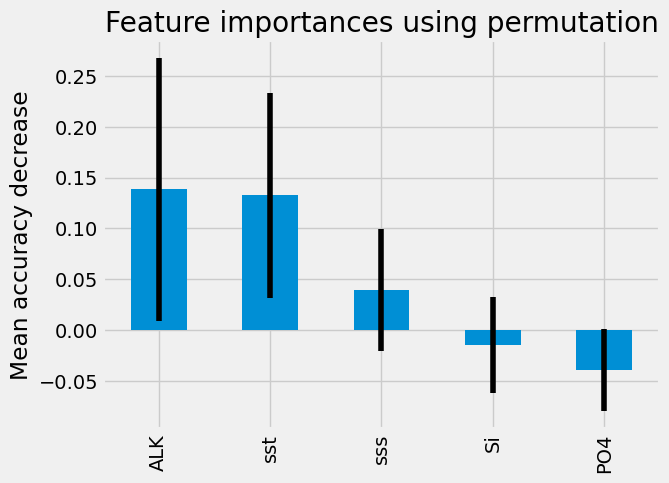

In [13]:
permutation_importances('pro', test_features, test_labels, feature_list_pro)

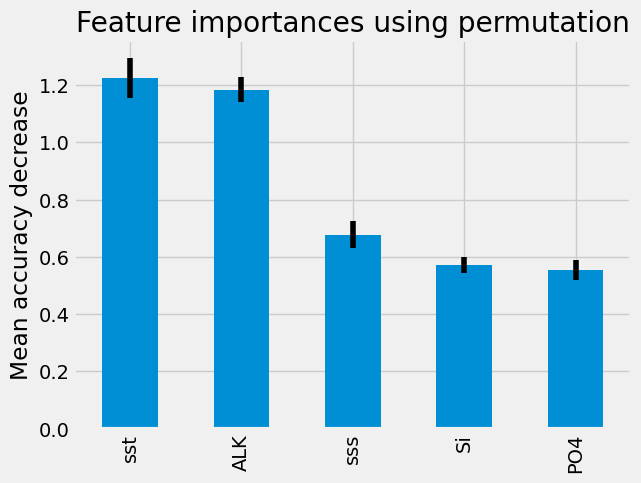

In [14]:
permutation_full(features_pro, labels_pro, feature_list_pro)

In [15]:
list_of_rmse = {'original': old_rmse,  
                'feature': feat_rmse,
                'permutation': perm_rmse}
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['feature'])/sorted_rmse['original'] * 100, '%' )

{'original': 2.496387334856863, 'feature': 2.4996937334994627, 'permutation': 2.5410907365450885}
the percent improvement is: -0.1324473408606365 %


In [16]:
drop = False
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, None)
param_grid = {
        'n_estimators': [40, 60, 70, 80, 100],
        'max_depth': [12, 18, 24, 32],
        'max_features': ['sqrt']
    }

metrics = ['neg_root_mean_squared_error', 'r2']
# neg root mean squared error is the same as root mean squared error, but since the function chooses the best score we need to use the negative 

grid_search_hyperparams(param_grid, metrics, features_pro, labels_pro)

Fitting 8 folds for each of 20 candidates, totalling 160 fits
Best hyperparameters for  neg_root_mean_squared_error are: {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 100}
Fitting 8 folds for each of 20 candidates, totalling 160 fits
Best hyperparameters for  r2 are: {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 100}
